# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [5]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [6]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [27]:
# Import the necessary CSVs to Pandas DataFrames
# YOUR CODE HERE!
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
file_path2 = Path("neighborhoods_coordinates.csv")
loc_data = pd.read_csv(file_path2)
df_costs = sfo_data[["sale_price_sqr_foot", "gross_rent"]].groupby(sfo_data.index).mean()
df2 = sfo_data.groupby(['year', 'neighborhood']).mean()
df2.reset_index(inplace=True)
df_all = sfo_data.groupby('neighborhood').mean()
df_all.reset_index(inplace=True)
df_all.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
df_all = pd.merge(loc_data, df_all, on='Neighborhood',how="inner")

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [48]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    df = sfo_data["housing_units"].groupby(sfo_data.index).mean()
    
    # YOUR CODE HERE!


def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    fig_prices = plt.figure()
    plot_units = df_costs.iloc[:,1].plot()
    plot_units.set_xlabel("year")
    plot_units.set_ylabel("price of rent")
    plot_units.set_title("average monthly rent in SF")    
    plotly_panel = pn.pane.Plotly(average_gross_rent)
    plotly_panel._updates=True
    return plotly_panel

def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    fig_prices = plt.figure()
    plot_units = df_costs.iloc[:,0].plot()
    plot_units.set_xlabel("year")
    plot_units.set_ylabel("price per square foot")
    plot_units.set_title("average price per sq foot in SF")
    plotly_panel_ = pn.pane.Plotly(average_sales_price)
    plotly_panel_._updates=True
    return plotly_panel_

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    df2[['sale_price_sqr_foot','year','neighborhood']].hvplot(x= "year", groupby="neighborhood",)
    df2[['gross_rent','year','neighborhood']].hvplot(x= "year", groupby="neighborhood"))
    plotly_panel_1 = pn.pane.Plotly(average_price_by_neighborhood
    plotly_panel_1._updates=True
    return plotly_panel_1


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    df_neighborhoods.head(10).hvplot.bar(y="sale_price_sqr_foot", x= "neighborhood", rot=90)
    # YOUR CODE HERE!
    plotly_panel_2 = pn.pane.Plotly(top_most_expensive_neighborhoods)
    plotly_panel_2._updates=True
    return plotly_panel_2

def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    df_neighborhoods2 = df2.sort_values(by="sale_price_sqr_foot", ascending=False)
    df_neighborhoods2.hvplot.bar(y = ['sale_price_sqr_foot','gross_rent'], groupby="neighborhood", rot=90))
    # YOUR CODE HERE!
    plotly_panel_3 = pn.pane.Plotly(most_expensive_neighborhoods_rent_sales
    plotly_panel_3._updates=True
    return plotly_panel_3
    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    # YOUR CODE HERE!



def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!



def neighborhood_map():
    """Neighborhood Map."""

    # YOUR CODE HERE!
    px.set_mapbox_access_token(map_box_api)
    neighborhood_map = px.scatter_mapbox(
        df_all,
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        zoom=10,
        hover_name="Neighborhood",
        title=" Avg Prices by Neighborhood in SF"
)
    plotly_panel_map = pn.pane.Plotly(neighborhood_map)
    plotly_panel_map._updates=True
    return plotly_panel_map

def sunburst():
    """Sunburst Plot."""
    
    # YOUR CODE HERE!


SyntaxError: invalid syntax (Temp/ipykernel_32172/1203454885.py, line 40)

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

ValueError: Plotly pane does not support objects of type 'function'.

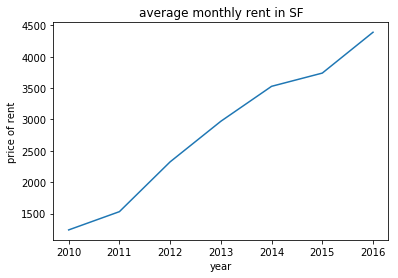

In [49]:
# Create a Title for the Dashboard
# YOUR CODE HERE!
title=pn.pane.Markdown("Real Estate Analysis of SF in Recent Years")

# Create a tab layout for the dashboard
# YOUR CODE HERE!
tabs= pn.Tabs(
    ("Welcome", pn.Column(neighborhood_map())),
    ("Analysis",pn.Column(housing_units_per_year(), average_gross_rent(), average_sales_price(), average_price_by_neighborhood()))
)
    

# Create the dashboard
# YOUR CODE HERE!
dashboard = pn.Column(pn.Row(title), tabs, width = 900)

## Serve the Panel Dashboard

In [40]:
# Serve the# dashboard
# YOUR CODE HERE!
dashboard.servable()

Column(width=900)
    [0] Row
        [0] Markdown(str)
    [1] Tabs(active=1)
        [0] Column
            [0] Plotly(Figure)
        [1] Column
            [0] Str(None)
            [1] Str(None)
            [2] Str(None)
            [3] Str(None)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# housing_units_per_year()

In [43]:
#average_gross_rent()

In [45]:
#average_sales_price()

In [ ]:
# average_price_by_neighborhood()

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [ ]:
# neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()